In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# # plt.style.use("seaborn-whitegrid")
# plt.rc("figure", autolayout=True)
# plt.rc(
#     "axes",
#     labelweight="bold",
#     labelsize="large",
#     titleweight="bold",
#     titlesize=14,
#     titlepad=10,
# )

autos = pd.read_csv("../datasets/Automobile_data.csv")
concrete = pd.read_excel("../datasets/Concrete_Data.xls")
customer = pd.read_csv("../datasets/costumer_data.csv")

In [23]:
autos.stroke = pd.to_numeric(autos.stroke, errors="coerce")
autos.horsepower = pd.to_numeric(autos.horsepower, errors="coerce")
autos.bore = pd.to_numeric(autos.bore, errors="coerce")
# autos.num_of_cylinders = pd.to_numeric(autos.num_of_cylinders, errors="coerce")
# autos[['num_of_cylinders', 'price']] = autos[['num_of_cylinders', 'price']].apply(pd.to_numeric, errors='coerce')
autos.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,city-mpg,highway-mpg,stroke_ratio,displacement
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,205.000000,205.000000,201.000000,201.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,25.219512,30.751220,0.984612,28.509144
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,6.542142,6.886443,0.125039,5.318108
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,13.000000,16.000000,0.632948,10.488845
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,19.000000,25.000000,0.936464,24.216639
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,24.000000,30.000000,1.022727,27.307661
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,30.000000,34.000000,1.069486,30.597714
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,49.000000,54.000000,1.294776,43.155801


In [31]:
autos.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'stroke_ratio', 'displacement'],
      dtype='object')

In [14]:
autos["stroke_ratio"] = autos.stroke / autos.bore

autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [24]:
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.symboling
)

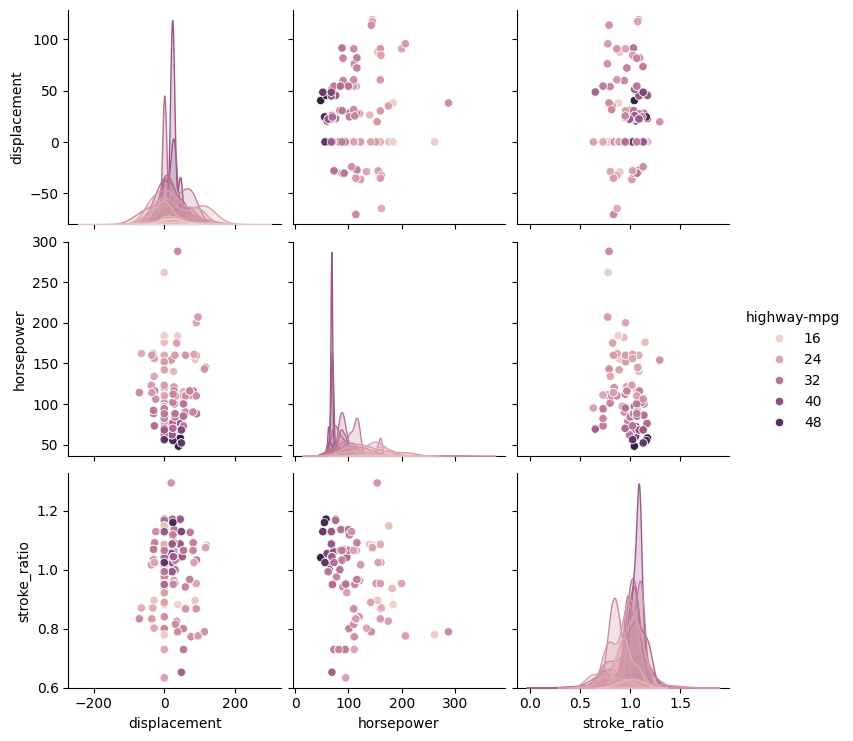

In [35]:
sns.pairplot(autos[["displacement", "horsepower", "stroke_ratio", "highway-mpg"]]
             , hue="highway-mpg")

/tmp/ipykernel_9416/3813747379.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(autos.stroke_ratio, shade=True, ax=axs[0])


<Axes: xlabel='stroke_ratio', ylabel='Density'>

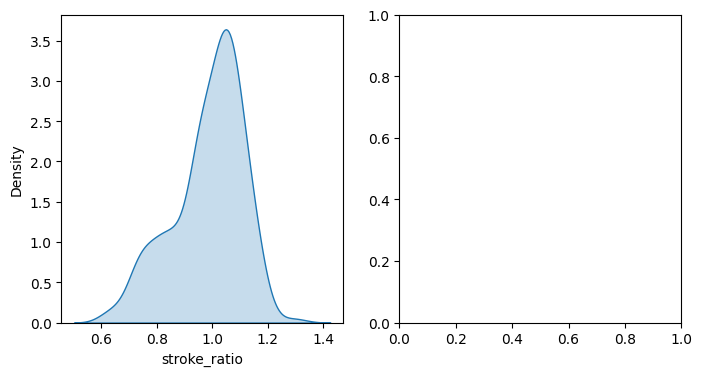

In [26]:
# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(autos.stroke_ratio, shade=True, ax=axs[0])
# sns.kdeplot(accidents.LogWindSpeed, shade=True, ax=axs[1]);

In [36]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
concrete["Components"] = concrete[components].gt(0).sum(axis=1)

concrete[components + ["Components"]].head(10)

KeyError: "None of [Index(['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',\n       'CoarseAggregate', 'FineAggregate'],\n      dtype='object')] are in the [columns]"